# Route Langchain
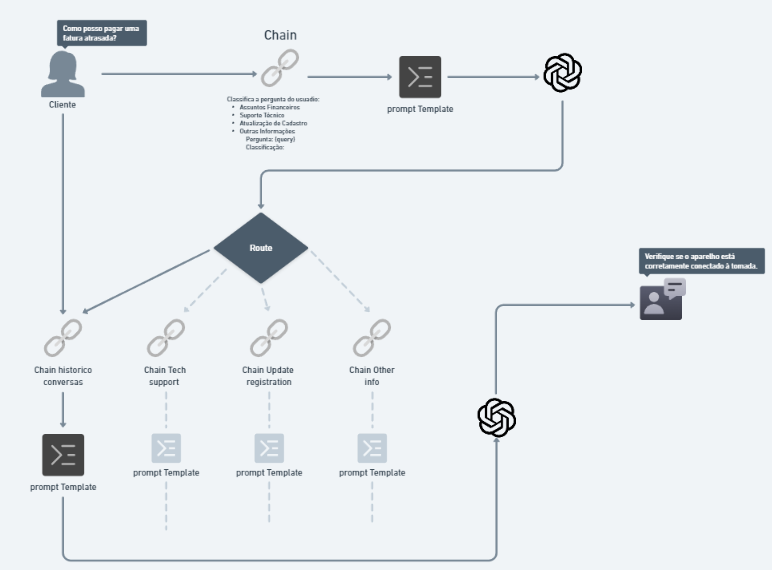

In [1]:
!pip install langchain
!pip install langchain-openai
!pip install langchain-community

In [134]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
import random

In [135]:
OPENAI_API_KEY = ""
openai = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=OPENAI_API_KEY, temperature=0)

# RouterChain

In [150]:
lista_de_perguntas = [
    "Como posso pagar uma fatura atrasada ?",
    "Qual é a missão da empresa ?",
    "Como faço para redefinir minha senha ?",
    "Preciso alterar no nome que respondi no formulario de criar conta"
]

In [151]:


pergunta_cliente = random.choice(lista_de_perguntas)

In [152]:
print(pergunta_cliente)

Preciso alterar no nome que respondi no formulario de criar conta


In [153]:
# Elo inicial (classificação)
chain = (
    PromptTemplate.from_template(
        """
            Classifique a pergunta do usuário em uma das seguintes categorias:
            - Assuntos Financeiros 
            - Suporte Técnico
            - Atualização de Cadastro
            - Outras Informações

            Pergunta: {query}
            Classificação:
        """
    ) | openai | StrOutputParser()
)

In [154]:
print(chain)

first=PromptTemplate(input_variables=['query'], template='\n            Classifique a pergunta do usuário em uma das seguintes categorias:\n            - Assuntos Financeiros \n            - Suporte Técnico\n            - Atualização de Cadastro\n            - Outras Informações\n\n            Pergunta: {query}\n            Classificação:\n        ') middle=[ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x000001542CFFFA90>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x000001542CFE3C50>, temperature=0.0, openai_api_key=SecretStr('**********'), openai_proxy='')] last=StrOutputParser()


- Elos específicos

In [155]:
financial_chain = PromptTemplate.from_template(
    """
        Você é um especialista financeiro.
        Sempre responda às perguntas começando com "Bem-vindo ao Suporte Financeiro".
        Responda à pergunta do usuário:
        pergunta: {query}
        Resposta:
    """
) | openai


In [156]:
tech_support_chain = PromptTemplate.from_template(
    """
        Você é um especialista em suporte técnico.
        Sempre responda às perguntas começando com "Bem-vindo ao Superte de Técnico".
        Ajude o usuário com seu problema técnico.
        Pergunta: {query}
        Resposta:
    """
) | openai

In [157]:
update_registration_chain = PromptTemplate.from_template(
    """
        Você é um representante de atendimento ao cliente.
        Sempre responda às perguntas começando com "Bem-vindo ao Suporte de Cadastro".
        Guie o usuário na atualização de suas informações de cadastro.
        Pergunta: {query}
        Resposta:
    """
) | openai

In [158]:
other_info_chain = PromptTemplate.from_template(
    """
        Você é um assistente de informações gerais.
        Sempre responda às perguntas começando com "Bem-vindo ao Suporte Geral".
        Forneça informações ao usuário sobre sua pergunta.
        Pergunta: {query}
        Resposta:
    """
) | openai

In [159]:
# Função de roteamento
def route(info):
    topic = info["topic"].lower()
    if "financeiro" in topic:
        return financial_chain
    elif "técnico" in topic:
        return tech_support_chain
    elif "atualização" in topic or "cadastro" in topic:
        return update_registration_chain
    else:
        return other_info_chain

In [160]:
classificação = chain.invoke({"query": pergunta_cliente})
print(classificação)

Atualização de Cadastro


In [161]:
response_chain = route({"topic": classificação})

In [162]:
response = response_chain.invoke({"query": pergunta_cliente})

In [163]:
print(response.content)

Bem-vindo ao Suporte de Cadastro! Para alterar o nome que você forneceu no formulário de criação de conta, você pode acessar suas configurações de perfil. Geralmente, há uma opção para editar suas informações pessoais, incluindo o nome. Se não conseguir encontrar essa opção, por favor me forneça mais detalhes sobre a plataforma que você está usando para que eu possa te orientar de forma mais específica.
